In [1]:
# data handling and analysis libraries
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import wkt

# machine learning
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import xgboost as xgb

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# map
import folium


# Fires Prediction Model
Now we are taking the DataFrame we have created and trying to predict probability of fire in each cell in each week.  
The steps we are taking to achieve that goal are:
- Dividing the data to train and test sets
- Trying different learning algorithms on out data with deafultic parameters.
- Analyzing the results and make changes accordingly.
- Trying again the different algorithms with some changes derived from last step.
- Optimyzing hyper parameters of the chosen algorithm.
- Analyzing the success of our model.


### load our main GeoDataFrame

In [2]:
gdf = gpd.read_file(r'data\shp\finle_gdf.shp',crs="EPSG:4326")
gdf.head()

Unnamed_ 0  Unnamed__1  fid  \
0           0           0  1.0   
1           1           1  2.0   
2           2           2  3.0   
3           3           3  4.0   
4           4           4  5.0   

                                            location  min_height  max_height  \
0  C:/Users/Dell/OneDrive - Technion/××× ×××...        91.0       214.0   
1  C:/Users/Dell/OneDrive - Technion/××× ×××...       141.0       463.0   
2  C:/Users/Dell/OneDrive - Technion/××× ×××...       165.0       592.0   
3  C:/Users/Dell/OneDrive - Technion/××× ×××...        61.0       521.0   
4  C:/Users/Dell/OneDrive - Technion/××× ×××...        48.0       400.0   

   avg_height  std_height  landCover  landCove_1  ...  landCove18   Latitude  \
0  148.968819   25.747558        0.0         0.0  ...         0.0  32.950419   
1  205.685903   34.354413        0.0         0.0  ...         0.0  32.950419   
2  246.467083   33.330296        0.0         0.0  ...         0.0  32.950419   
3  230.628333   47.022054        0.0         0.0  ...         0.0  32.950419   
4  164.990556   49.978685        0.0         0.0  ...         0.0  32.950419   

    Longitude  week  year  fire  dry_days  is_rain_ac       TMAX  \
0 -114.950417     0  2012   NaN      17.0         0.0  80.857143   
1 -114.850417     0  2012   NaN      18.0         0.0  76.857143   
2 -114.750417     0  2012   NaN      18.0         0.0  76.857143   
3 -114.650417     0  2012   NaN      18.0         0.0  76.857143   
4 -114.550417     0  2012   NaN      18.0         0.0  76.857143   

                                            geometry  
0  POLYGON ((-115.00042 33.00042, -114.90042 33.0...  
1  POLYGON ((-114.90042 33.00042, -114.80042 33.0...  
2  POLYGON ((-114.80042 33.00042, -114.70042 33.0...  
3  POLYGON ((-114.70042 33.00042, -114.60042 33.0...  
4  POLYGON ((-114.60042 33.00042, -114.50042 33.0...  

[5 rows x 36 columns]

In [3]:
gdf_results = gdf[gdf['year']== 2015]
# replace nans with zeros in the label colomn
gdf_results['fire'] = gdf_results['fire'].fillna(0)

### arrange data for learning

In [4]:
years = gdf['year'] # save for later use
weeks = gdf['week']
# gdf = gdf.drop(columns=['fid', 'location', 'week', 'year','Unnamed_ 0','Unnamed__1', 'Longitude'])

In [5]:
pd.set_option('display.max_columns', None)
gdf.head(2)


Unnamed_ 0  Unnamed__1  fid  \
0           0           0  1.0   
1           1           1  2.0   

                                            location  min_height  max_height  \
0  C:/Users/Dell/OneDrive - Technion/××× ×××...        91.0       214.0   
1  C:/Users/Dell/OneDrive - Technion/××× ×××...       141.0       463.0   

   avg_height  std_height  landCover  landCove_1  landCove_2  landCove_3  \
0  148.968819   25.747558        0.0         0.0         0.0         0.0   
1  205.685903   34.354413        0.0         0.0         0.0         0.0   

   landCove_4  landCove_5  landCove_6  landCove_7  landCove_8  landCove_9  \
0         0.0         0.0         1.0         0.0         1.0         0.0   
1         0.0         0.0         1.0         0.0         1.0         0.0   

   landCove10  landCove11  landCove12  landCove13  landCove14  landCove15  \
0         0.0         0.0         0.0         0.0         0.0         1.0   
1         0.0         0.0         0.0         0.0         0.0         1.0   

   landCove16  landCove17  landCove18   Latitude   Longitude  week  year  \
0         0.0         0.0         0.0  32.950419 -114.950417     0  2012   
1         1.0         0.0         0.0  32.950419 -114.850417     0  2012   

   fire  dry_days  is_rain_ac       TMAX  \
0   NaN      17.0         0.0  80.857143   
1   NaN      18.0         0.0  76.857143   

                                            geometry  
0  POLYGON ((-115.00042 33.00042, -114.90042 33.0...  
1  POLYGON ((-114.90042 33.00042, -114.80042 33.0...

In [6]:
# replace nans with zeros in the label colomn
gdf['fire'] = gdf['fire'].fillna(0)

In [7]:
gdf.head(2)

Unnamed_ 0  Unnamed__1  fid  \
0           0           0  1.0   
1           1           1  2.0   

                                            location  min_height  max_height  \
0  C:/Users/Dell/OneDrive - Technion/××× ×××...        91.0       214.0   
1  C:/Users/Dell/OneDrive - Technion/××× ×××...       141.0       463.0   

   avg_height  std_height  landCover  landCove_1  landCove_2  landCove_3  \
0  148.968819   25.747558        0.0         0.0         0.0         0.0   
1  205.685903   34.354413        0.0         0.0         0.0         0.0   

   landCove_4  landCove_5  landCove_6  landCove_7  landCove_8  landCove_9  \
0         0.0         0.0         1.0         0.0         1.0         0.0   
1         0.0         0.0         1.0         0.0         1.0         0.0   

   landCove10  landCove11  landCove12  landCove13  landCove14  landCove15  \
0         0.0         0.0         0.0         0.0         0.0         1.0   
1         0.0         0.0         0.0         0.0         0.0         1.0   

   landCove16  landCove17  landCove18   Latitude   Longitude  week  year  \
0         0.0         0.0         0.0  32.950419 -114.950417     0  2012   
1         1.0         0.0         0.0  32.950419 -114.850417     0  2012   

   fire  dry_days  is_rain_ac       TMAX  \
0   0.0      17.0         0.0  80.857143   
1   0.0      18.0         0.0  76.857143   

                                            geometry  
0  POLYGON ((-115.00042 33.00042, -114.90042 33.0...  
1  POLYGON ((-114.90042 33.00042, -114.80042 33.0...

### Preprocess: split data to features and labels

In [8]:
X = pd.DataFrame(gdf.drop(columns=['fire','geometry','fid', 'location', 'year','Unnamed_ 0','Unnamed__1', 'Longitude']))
y = pd.DataFrame(gdf['fire'])
y.head()

fire
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0

## Dividing the data to train and test sets
The test set is the rows of the last year, so we can check actual predictions and avoid "data spilling" from the train to the test

In [9]:
# the test set will be the the last year we have data for
last_train_index = 162240
X_train = X.loc[:last_train_index]
X_test = X.loc[last_train_index:]
y_train = y.loc[:last_train_index]
y_test = y.loc[last_train_index:]

In [11]:
X_train.head()

min_height  max_height  avg_height  std_height  landCover  landCove_1  \
0        91.0       214.0  148.968819   25.747558        0.0         0.0   
1       141.0       463.0  205.685903   34.354413        0.0         0.0   
2       165.0       592.0  246.467083   33.330296        0.0         0.0   
3        61.0       521.0  230.628333   47.022054        0.0         0.0   
4        48.0       400.0  164.990556   49.978685        0.0         0.0   

   landCove_2  landCove_3  landCove_4  landCove_5  landCove_6  landCove_7  \
0         0.0         0.0         0.0         0.0         1.0         0.0   
1         0.0         0.0         0.0         0.0         1.0         0.0   
2         0.0         0.0         0.0         0.0         1.0         0.0   
3         0.0         0.0         0.0         0.0         1.0         0.0   
4         0.0         0.0         0.0         0.0         1.0         0.0   

   landCove_8  landCove_9  landCove10  landCove11  landCove12  landCove13  \
0         1.0         0.0         0.0         0.0         0.0         0.0   
1         1.0         0.0         0.0         0.0         0.0         0.0   
2         1.0         0.0         0.0         0.0         0.0         0.0   
3         1.0         0.0         0.0         0.0         0.0         0.0   
4         1.0         0.0         0.0         0.0         0.0         1.0   

   landCove14  landCove15  landCove16  landCove17  landCove18   Latitude  \
0         0.0         1.0         0.0         0.0         0.0  32.950419   
1         0.0         1.0         1.0         0.0         0.0  32.950419   
2         0.0         1.0         0.0         0.0         0.0  32.950419   
3         0.0         1.0         0.0         0.0         0.0  32.950419   
4         0.0         1.0         0.0         1.0         0.0  32.950419   

   week  dry_days  is_rain_ac       TMAX  
0     0      17.0         0.0  80.857143  
1     0      18.0         0.0  76.857143  
2     0      18.0         0.0  76.857143  
3     0      18.0         0.0  76.857143  
4     0      18.0         0.0  76.857143

## Building succes parameter

We want to measure our model succes by evaluating how many fires we could have prevented from spreading.  
Our idea is based on fact that in reality we could reinforce fire protecsion forces in limited number of places.  
So our premessis is that we could reinforce fire protection in maximum of 10 areas, so we will count how many of our top 10 fire hazarad predictions that meet a minimum probability threshold were successful in every week of the year. 

In [12]:
def model_success(gdf_results, y_prob, maximum_areas=10):
    fire_threshold = 0.5 # minimum fire probability to consider 
    fires_prevented = 0 # number of fires prevented
    for week in range(52):
        gdf_week = gdf_results[gdf_results['week']== week]
        gdf_week['fire_risk'] = y_prob[1040*week:1040*week+1040,1]
        top_fire_risk = gdf_week.nlargest(maximum_areas,'fire_risk')
        top_fire_risk = top_fire_risk[top_fire_risk['fire_risk']>fire_threshold]
        fires_prevented = fires_prevented + top_fire_risk['fire'].sum()
    return fires_prevented

## Trying different learning algorithms on out data with deafultic parameters

In [13]:
def LearningAlgorithms(x_train, y_train, x_test, y_test):

    # ANN
    # mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
    # mlp.fit(x_train, y_train.values.ravel())
    # predictions = mlp.predict(x_test)
    # print('ANN: ')
    # print('confusion matrix: ')
    # print(confusion_matrix(y_test,predictions))
    # print('classification report: ')
    # print(classification_report(y_test,predictions))
    # print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')

    # Random Forest
    forest_clf = RandomForestClassifier(n_estimators=100)
    forest_clf.fit(x_train, y_train)
    y_pred = forest_clf.predict(x_test)
    y_prob = forest_clf.predict_proba(x_test)
    print('Random Forest: ')
    print('Number of fires prevented: ')
    print(int(model_success(gdf_results, y_prob)))
    print('confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('classification report: ')
    print(classification_report(y_test,y_pred))
    feature_importance = pd.Series(forest_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
    sns.barplot(x=feature_importance.values, y=feature_importance.index)
    plt.title('Random Forest Features Importance')
    print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')

    # XGBoost
    xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
    xg_reg.fit(x_train,y_train)

    y_pred = xg_reg.predict(x_test)
    y_prob = xg_reg.predict_proba(x_test)
    # data_dmatrix = xgb.DMatrix(data=x_train,label=y_train,feature_nameX.columns.values)
    # params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
    #                 'max_depth': 5, 'alpha': 10, 'n_estimators': 100}
    # xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
    # y_pred = xg_reg.predict(x_test)
    print('XGBosst: ')
    print('Number of fires prevented: ')
    print(int(model_success(gdf_results, y_prob)))
    print('confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('classification report: ')
    print(classification_report(y_test,y_pred))
    xgb.plot_importance(xg_reg)
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.title('XGboost Features Importance')
    plt.show()

### Feature Scaling

In [14]:
X_train = X.loc[:last_train_index]
X_test = X.loc[last_train_index:]
y_train = y.loc[:last_train_index]
y_test = y.loc[last_train_index:]

scalar = StandardScaler()
scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

### Scikit learn ANN

In [15]:

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)


Evaluate the Algorithm

In [16]:

print('Number of fires prevented: ')
print(int(model_success(gdf_results, y_prob)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')


Number of fires prevented: 
2
[[52916     8]
 [ 1154     2]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     52924
         1.0       0.20      0.00      0.00      1156

    accuracy                           0.98     54080
   macro avg       0.59      0.50      0.50     54080
weighted avg       0.96      0.98      0.97     54080

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


### Scikit learn Random Forest 

In [17]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)
y_prob = forest_clf.predict_proba(X_test)
print('Number of fires prevented: ')
print(int(model_success(gdf_results, y_prob)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Number of fires prevented: 
74
[[52695   229]
 [ 1072    84]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     52924
         1.0       0.27      0.07      0.11      1156

    accuracy                           0.98     54080
   macro avg       0.62      0.53      0.55     54080
weighted avg       0.96      0.98      0.97     54080



Text(0.5, 1.0, 'Visualizing Features Importance')

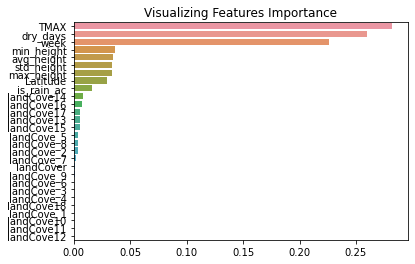

In [18]:
feature_importance = pd.Series(forest_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Visualizing Features Importance')

### XGBoost - Gradient Boosting


In [19]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 1, n_estimators = 100)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
y_prob = xg_reg.predict_proba(X_test)
print('Number of fires prevented: ')
print(int(model_success(gdf_results, y_prob)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Number of fires prevented: 
1
[[52923     1]
 [ 1155     1]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     52924
         1.0       0.50      0.00      0.00      1156

    accuracy                           0.98     54080
   macro avg       0.74      0.50      0.50     54080
weighted avg       0.97      0.98      0.97     54080



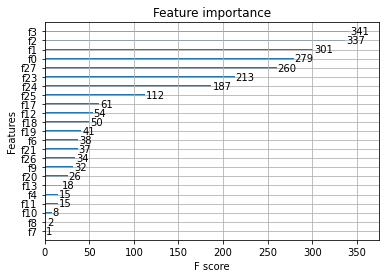

In [20]:

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

the most important features:  
f3 - std height  
f2 - avg height  
f1 - max height    
f0 - min height    
f27 - TMAX   
f23 - latitude  
f24 - week  
f25 - dry days

## Analize results  
We can see in both random forest and gradient boosting that the weather and topography features had a large importance.

### Data Analysis

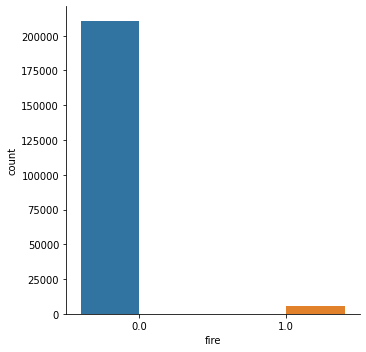

In [22]:
sns.catplot(x = "fire", hue="fire", kind="count", data=gdf)

### We can see we have highly imbalanced classes  
This means that the high accuracy we got in our predictions is missleading.
We didn't realy predicted any fires but just label "non fire" all the time.
The scikit Random forest is the only algorithm so far that actually predicted some of the fires

## Handling imbalanced classes

### Upsampling

In [23]:
df_train = gdf.loc[:last_train_index]
# Separate majority and minority classes
df_majority = df_train[df_train['fire']==0]
df_minority = df_train[df_train['fire']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=157651,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.fire.value_counts()

1.0    157651
0.0    157651
Name: fire, dtype: int64

In [24]:
y_train_upsampled = pd.DataFrame(df_upsampled['fire'])
# y_train_upsampled = df_upsampled.fire
X_train_upsampled = df_upsampled.drop(columns=['fire','geometry','fid', 'location', 'year','Unnamed_ 0','Unnamed__1', 'Longitude'], axis=1)
X_train_upsampled.columns

Index(['min_height', 'max_height', 'avg_height', 'std_height', 'landCover',
       'landCove_1', 'landCove_2', 'landCove_3', 'landCove_4', 'landCove_5',
       'landCove_6', 'landCove_7', 'landCove_8', 'landCove_9', 'landCove10',
       'landCove11', 'landCove12', 'landCove13', 'landCove14', 'landCove15',
       'landCove16', 'landCove17', 'landCove18', 'Latitude', 'week',
       'dry_days', 'is_rain_ac', 'TMAX'],
      dtype='object')

In [25]:
X_test = X.loc[last_train_index:]

scalar = StandardScaler()
scalar.fit(X_train_upsampled)

X_train_upsampled = scalar.transform(X_train_upsampled)
X_test_upsampled = scalar.transform(X_test)

Random Forest: 
Number of fires prevented: 
86
confusion matrix: 
[[52280   644]
 [  992   164]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     52924
         1.0       0.20      0.14      0.17      1156

    accuracy                           0.97     54080
   macro avg       0.59      0.56      0.58     54080
weighted avg       0.96      0.97      0.97     54080

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
XGBosst: 
Number of fires prevented: 
119
confusion matrix: 
[[39982 12942]
 [  195   961]]
classification report: 
              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     52924
         1.0       0.07      0.83      0.13      1156

    accuracy                           0.76     54080
   macro avg       0.53      0.79      0.49     54080
weighted avg       0.98      0.76      0.84     54080



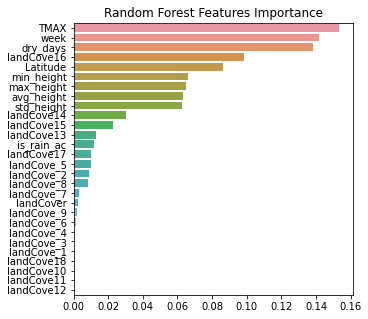

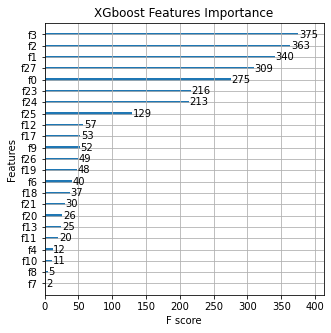

In [26]:
LearningAlgorithms(X_train_upsampled, y_train_upsampled, X_test_upsampled, y_test)

### Scikit learn ANN

In [27]:

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train_upsampled, y_train_upsampled.values.ravel())
y_pred = mlp.predict(X_test_upsampled)
y_prob = mlp.predict_proba(X_test_upsampled)


In [28]:
print('Number of fires prevented: ')
print(int(model_success(gdf_results, y_prob)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Number of fires prevented: 
130
[[39673 13251]
 [  219   937]]
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     52924
         1.0       0.07      0.81      0.12      1156

    accuracy                           0.75     54080
   macro avg       0.53      0.78      0.49     54080
weighted avg       0.97      0.75      0.84     54080



### Down sample

In [29]:
df_train = gdf.loc[:last_train_index]
# Separate majority and minority classes
df_majority = df_train[df_train['fire']==0]
df_minority = df_train[df_train['fire']==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=4590,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.fire.value_counts()


1.0    4590
0.0    4590
Name: fire, dtype: int64

In [30]:
y_train_downsampled = df_downsampled.fire
X_train_downsampled = df_downsampled.drop(columns=['fire','geometry','fid', 'location', 'year','Unnamed_ 0','Unnamed__1', 'Longitude'], axis=1)

In [31]:
X_test = X.loc[last_train_index:]

scalar = StandardScaler()
scalar.fit(X_train_downsampled)

X_train_downsampled = scalar.transform(X_train_downsampled)
X_test_downsampled = scalar.transform(X_test)

Random Forest: 
Number of fires prevented: 
87
confusion matrix: 
[[40491 12433]
 [  237   919]]
classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86     52924
         1.0       0.07      0.79      0.13      1156

    accuracy                           0.77     54080
   macro avg       0.53      0.78      0.50     54080
weighted avg       0.97      0.77      0.85     54080

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
XGBosst: 
Number of fires prevented: 
122
confusion matrix: 
[[39043 13881]
 [  189   967]]
classification report: 
              precision    recall  f1-score   support

         0.0       1.00      0.74      0.85     52924
         1.0       0.07      0.84      0.12      1156

    accuracy                           0.74     54080
   macro avg       0.53      0.79      0.48     54080
weighted avg       0.98      0.74      0.83     54080



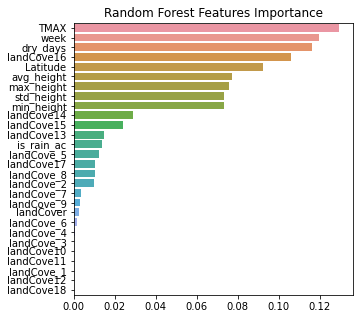

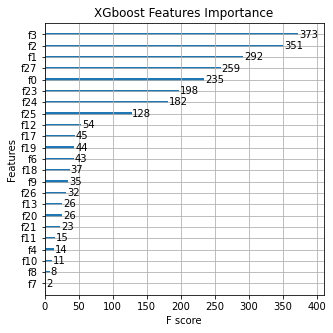

In [32]:
LearningAlgorithms(X_train_downsampled, y_train_downsampled, X_test_downsampled, y_test)

In [33]:

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train_downsampled, y_train_downsampled.values.ravel())
y_pred = mlp.predict(X_test_downsampled)
y_prob = mlp.predict_proba(X_test_downsampled)


In [34]:
print('Number of fires prevented: ')
print(int(model_success(gdf_results, y_prob)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Number of fires prevented: 
84
[[37102 15822]
 [  206   950]]
              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82     52924
         1.0       0.06      0.82      0.11      1156

    accuracy                           0.70     54080
   macro avg       0.53      0.76      0.46     54080
weighted avg       0.97      0.70      0.81     54080



## conclusion
The best result considering our success parameter was 130 fires prevented, it was given by the ANN with upsampling.  
The second best was 122 fires prevented, it was given by XGBoost with downsampling.  
Because XGBoost with downsampling calculation took a friction of the time we will choose it for our model and optimize it's hyper parameters. 


## Optimyzing hyper parameters of XGBoost

Best: -0.503193 using {'learning_rate': 0.2}
-0.691067 (0.000349) with: {'learning_rate': 0.0001}
-0.674173 (0.003281) with: {'learning_rate': 0.001}
-0.590304 (0.017285) with: {'learning_rate': 0.01}
-0.509686 (0.019670) with: {'learning_rate': 0.1}
-0.503193 (0.019906) with: {'learning_rate': 0.2}
-0.512884 (0.026564) with: {'learning_rate': 0.3}
-0.527890 (0.031604) with: {'learning_rate': 0.4}
-0.543081 (0.027422) with: {'learning_rate': 0.5}


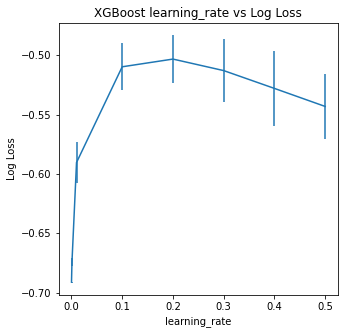

In [144]:
# taken from here:
# https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

# grid search
model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(learning_rate=learning_rate)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
kfold = StratifiedKFold(n_splits=3, shuffle=False)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_downsampled, y_train_downsampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.savefig('learning_rate.png')

Interestingly, we can see that the best learning rate was 0.2.

This is a high learning rate and it suggest that perhaps the default number of trees of 100 is too low and needs to be increased.

### Tuning Learning Rate and the Number of Trees in

Best: -0.503193 using {'learning_rate': 0.2, 'n_estimators': 100}
-0.692101 (0.000175) with: {'learning_rate': 0.0001, 'n_estimators': 50}
-0.691067 (0.000349) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.689032 (0.000694) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.687041 (0.001036) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.685091 (0.001375) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.683178 (0.001712) with: {'learning_rate': 0.001, 'n_estimators': 50}
-0.674173 (0.003281) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.658615 (0.006204) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.645734 (0.009016) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.634936 (0.011589) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.625390 (0.013566) with: {'learning_rate': 0.01, 'n_estimators': 50}
-0.590304 (0.017285) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.552148 (0.019348) with: {'learning_rate': 0.01, 'n_esti

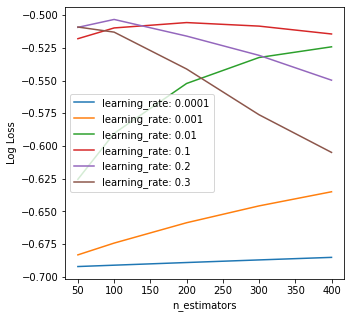

In [146]:
model = xgb.XGBClassifier()
# n_estimators = [100, 200, 300, 400, 500, 600]
n_estimators = [50, 100, 200, 300, 400]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
kfold = StratifiedKFold(n_splits=3, shuffle=False)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_downsampled, y_train_downsampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_learning_rate.png')

Best: -0.503193 using {'learning_rate': 0.2, 'n_estimators': 100}
-0.625390 (0.013566) with: {'learning_rate': 0.01, 'n_estimators': 50}
-0.590304 (0.017285) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.552148 (0.019348) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.532290 (0.019537) with: {'learning_rate': 0.01, 'n_estimators': 300}
-0.524118 (0.020217) with: {'learning_rate': 0.01, 'n_estimators': 400}
-0.519614 (0.020872) with: {'learning_rate': 0.01, 'n_estimators': 500}
-0.516903 (0.021070) with: {'learning_rate': 0.01, 'n_estimators': 600}
-0.514677 (0.020082) with: {'learning_rate': 0.01, 'n_estimators': 700}
-0.517912 (0.019359) with: {'learning_rate': 0.1, 'n_estimators': 50}
-0.509686 (0.019670) with: {'learning_rate': 0.1, 'n_estimators': 100}
-0.505580 (0.021365) with: {'learning_rate': 0.1, 'n_estimators': 200}
-0.508289 (0.023553) with: {'learning_rate': 0.1, 'n_estimators': 300}
-0.514305 (0.029465) with: {'learning_rate': 0.1, 'n_estimators': 400}
-0.52

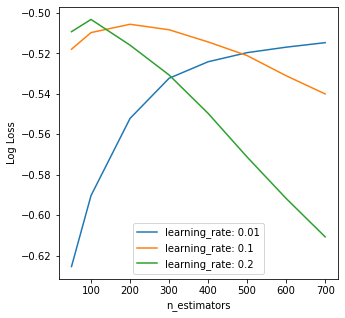

In [148]:
model = xgb.XGBClassifier(objective ='binary:logistic')
# n_estimators = [100, 200, 300, 400, 500, 600]
n_estimators = [50, 100, 200, 300, 400, 500, 600, 700]
learning_rate = [0.01, 0.1, 0.2]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
kfold = StratifiedKFold(n_splits=3, shuffle=False)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_downsampled, y_train_downsampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_learning_rate.png')

we can see that for learning rate = 0.1 we plato at arround 200 estimators.



### Tuning max depth 

Best: -0.503193 using {'max_depth': 3}
-0.512194 (0.021087) with: {'max_depth': 2}
-0.503193 (0.019906) with: {'max_depth': 3}
-0.534553 (0.032212) with: {'max_depth': 5}
-0.590658 (0.040479) with: {'max_depth': 7}
-0.609978 (0.049125) with: {'max_depth': 8}
-0.640537 (0.052818) with: {'max_depth': 9}
-0.649313 (0.052315) with: {'max_depth': 10}
-0.727285 (0.076981) with: {'max_depth': 15}


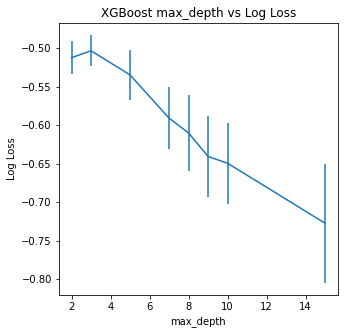

In [188]:
# grid search
model = xgb.XGBClassifier( objective ='binary:logistic', learning_rate=0.2, n_estimators=100)
max_depth = [2,3,5,7,8,9,10,15]
param_grid = dict(max_depth=max_depth)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_downsampled, y_train_downsampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

we can see that for max_depth = 5 we got the best result.

### Tuning min_child_weight

Best: -0.498987 using {'min_child_weight': 10}
-0.503443 (0.017619) with: {'min_child_weight': 5}
-0.501408 (0.021055) with: {'min_child_weight': 7}
-0.502142 (0.021967) with: {'min_child_weight': 8}
-0.503442 (0.018847) with: {'min_child_weight': 9}
-0.498987 (0.020821) with: {'min_child_weight': 10}
-0.500778 (0.020191) with: {'min_child_weight': 12}
-0.500042 (0.020368) with: {'min_child_weight': 15}


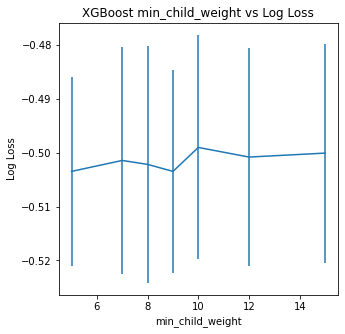

In [191]:
# grid search
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate=0.2, n_estimators=100, max_depth=3)
min_child_weight = [5,7,8,9,10,12,15]
param_grid = dict(min_child_weight=min_child_weight)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_downsampled, y_train_downsampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(min_child_weight, means, yerr=stds)
plt.title("XGBoost min_child_weight vs Log Loss")
plt.xlabel('min_child_weight')
plt.ylabel('Log Loss')
plt.savefig('min_child_weight.png')

### Checking the tuning effect on our success parameter

Number of fires prevented: 
118
[[39162 13762]
 [  208   948]]
              precision    recall  f1-score   support

         0.0       0.99      0.74      0.85     52924
         1.0       0.06      0.82      0.12      1156

    accuracy                           0.74     54080
   macro avg       0.53      0.78      0.48     54080
weighted avg       0.97      0.74      0.83     54080



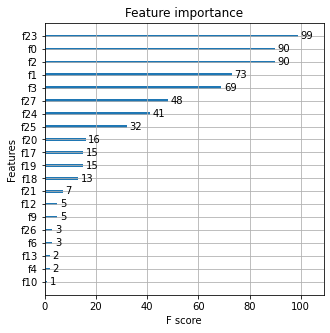

In [192]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', learning_rate=0.2, n_estimators=100, max_depth=3, min_child_weight=10)
xg_reg.fit(X_train_downsampled,y_train_downsampled)
y_pred = xg_reg.predict(X_test_downsampled)
y_prob = xg_reg.predict_proba(X_test_downsampled)
print('Number of fires prevented: ')
print(int(model_success(gdf_results, y_prob)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### We can see that tuning the parameters according to loglos cost function doesn't improve our success parameter result.

## Analyzing the success of our model

### Results Visualization
We will create a fire risk map that will visualize our results and can help for further analysis


In [39]:
fires = gpd.read_file(r'data/fires_2012-15.shp',crs='"EPSG:4326"')
pd.set_option('display.max_columns', None)
fires.head(2)

Unnamed_ 0  OBJECTID     FOD_ID      FPA_ID SOURCE_SYS   SOURCE_S_1  \
0     1567432   1567433  201433714  FS-1503920        FED  FS-FIRESTAT   
1     1567433   1567434  201433715  FS-1507944        FED  FS-FIRESTAT   

  NWCG_REPOR NWCG_REP_1               NWCG_REP_2 SOURCE_REP  \
0         FS    USCAANF  Angeles National Forest       0501   
1         FS    USCAANF  Angeles National Forest       0501   

                SOURCE_R_1  LOCAL_FIRE LOCAL_INCI FIRE_CODE FIRE_NAME  \
0  Angeles National Forest        87.0         13      EK1S     HORSE   
1  Angeles National Forest       157.0        103      EK1S  BUCKHORN   

  ICS_209_IN ICS_209_NA MTBS_ID MTBS_FIRE_ COMPLEX_NA  FIRE_YEAR  DISCOVERY_  \
0       None       None    None       None       None       2012   2456104.5   
1       None       None    None       None       None       2012   2456180.5   

   DISCOVER_1  DISCOVER_2  STAT_CAUSE     STAT_CAU_1  CONT_DATE  CONT_DOY  \
0         178      1030.0         9.0  Miscellaneous  2456104.5     178.0   
1         254      1010.0         1.0      Lightning  2456180.5     254.0   

   CONT_TIME  FIRE_SIZE FIRE_SIZE_   LATITUDE   LONGITUDE  OWNER_CODE  \
0     1125.0        0.1          A  34.204167 -117.808333         5.0   
1     1059.0        0.1          A  34.345278 -117.928889         5.0   

  OWNER_DESC STATE COUNTY  FIPS_CODE    FIPS_NAME  \
0       USFS    CA    037       37.0  Los Angeles   
1       USFS    CA    037       37.0  Los Angeles   

                                               Shape  \
0  b'\x00\x01\xad\x10\x00\x00x\'\xb8\xbb\xbbs]\xc...   
1  b'\x00\x01\xad\x10\x00\x00\xb8\nc\xear{]\xc0`\...   

                      geometry  
0  POINT (-117.80833 34.20417)  
1  POINT (-117.92889 34.34528)

In [40]:
def visualize_prediction(week,gdf_results,y_prob):
    # train and test fires of this week
    temp_fires = fires[fires['DISCOVER_1']//7 == week]
    train_fires = temp_fires[temp_fires['FIRE_YEAR']<2015]
    test_fires = temp_fires[temp_fires['FIRE_YEAR'] == 2015]

    # fire propability predictions
    gdf_for_visualization = gdf_results[gdf_results['week']== week]
    # gdf_for_visualization = gdf.loc[121680+1040*week:121680+1039+1040*week,:]
    gdf_for_visualization['fire_risk'] = y_prob[1040*week:1040*week+1040,1]
    gdf_for_visualization['index'] = gdf_for_visualization.index
    gdf_for_visualization.head()

    # centroid for map
    x_map=gdf_for_visualization.centroid.x.mean()
    y_map=gdf_for_visualization.centroid.y.mean()

    # create folium map
    m = folium.Map(location=[y_map, x_map],
                        tiles = "Stamen Terrain",
                        zoom_start = 5)

    # adding colors by prediction probability values
    m.choropleth(
    geo_data=gdf_for_visualization,
    name='Choropleth',
    data=gdf_for_visualization,
    columns=['index','fire_risk'],
    key_on="feature.properties.index",
    fill_color='OrRd',
    # threshold_scale=myscale,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='fire risk',
    )
    folium.LayerControl().add_to(m)

    # add intercative cell data
    style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
    highlight_function = lambda x: {'fillColor': '#000000', 
                                    'color':'#000000', 
                                    'fillOpacity': 0.50, 
                                    'weight': 0.1}
    NIL = folium.features.GeoJson(
        gdf_for_visualization,
        style_function=style_function, 
        control=False,
        highlight_function=highlight_function, 
        tooltip=folium.features.GeoJsonTooltip(
            fields=['index','fire_risk','dry_days','TMAX','avg_height'],
            aliases=['area id: ','fire_risk: ','dry_days: ','TMAX: ','avg height: '],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
        )
    )
    m.add_child(NIL)
    m.keep_in_front(NIL)
    folium.LayerControl().add_to(m)

    # add fires markers

    for index in train_fires.index:
        folium.CircleMarker( location=[ train_fires.loc[index,'LATITUDE'], train_fires.loc[index,'LONGITUDE'] ], color ='#43d9de', radius=2 ).add_to(m)
    for index in test_fires.index:
        folium.CircleMarker( location=[ test_fires.loc[index,'LATITUDE'], test_fires.loc[index,'LONGITUDE'] ], color ='#2f12b3', radius=3 ).add_to(m)

    return m

We have now a function that gets a week number and returns map of the predictions.

In [41]:
cells = pd.read_csv(r'data\finle_gdf.csv')
cells['geometry'] = cells['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(cells, geometry='geometry',crs="EPSG:4326")
gdf.head(2)

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  fid  \
0           0             0               0  1.0   
1           1             1               1  2.0   

                                            location  min_height  max_height  \
0  C:/Users/Dell/OneDrive - Technion/××× ×××...        91.0       214.0   
1  C:/Users/Dell/OneDrive - Technion/××× ×××...       141.0       463.0   

   avg_height  std_height  landCover  landCove_1  landCove_2  landCove_3  \
0  148.968819   25.747558        0.0         0.0         0.0         0.0   
1  205.685903   34.354413        0.0         0.0         0.0         0.0   

   landCove_4  landCove_5  landCove_6  landCove_7  landCove_8  landCove_9  \
0         0.0         0.0         1.0         0.0         1.0         0.0   
1         0.0         0.0         1.0         0.0         1.0         0.0   

   landCove10  landCove11  landCove12  landCove13  landCove14  landCove15  \
0         0.0         0.0         0.0         0.0         0.0         1.0   
1         0.0         0.0         0.0         0.0         0.0         1.0   

   landCove16  landCove17  landCove18  \
0         0.0         0.0         0.0   
1         1.0         0.0         0.0   

                                            geometry  \
0  POLYGON ((-115.00042 33.00042, -114.90042 33.0...   
1  POLYGON ((-114.90042 33.00042, -114.80042 33.0...   

                                    weather stations   Latitude   Longitude  \
0  ['USC00042713', 'USW00023158', 'USW00053154', ...  32.950419 -114.950417   
1  ['USW00053154', 'USW00023158', 'USC00042713', ...  32.950419 -114.850417   

   week  year  fire  dry_days  is_rain_accpected       TMAX  
0     0  2012   NaN      17.0                0.0  80.857143  
1     0  2012   NaN      18.0                0.0  76.857143

### The best model we got

In [193]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
mlp.fit(X_train_upsampled, y_train_upsampled.values.ravel())
y_pred = mlp.predict(X_test_upsampled)
y_prob = mlp.predict_proba(X_test_upsampled)

In [194]:
gdf_results = gdf[gdf['year']== 2015]
# replace nans with zeros in the label colomn
gdf_results['fire'] = gdf_results['fire'].fillna(0)

### Blue circles are real fires from the test set of the chosen week and the cyan circles are the train fires from that week in previous years   

In [195]:
m = visualize_prediction(30,gdf_results,y_prob)
m

We can see some intresting results. We think the most intresting is we can see some successful predictions in cells that never had a fire on the specified week.

### Calculate naive statistic to compare with
We are checking in every cell in every week how many timed their were fires. 

In [86]:
number_of_train_years = 3
temp_gdf = gdf.loc[:last_train_index]
temp_gdf = temp_gdf[['fid','week','fire']]
temp_gdf['fire'] = temp_gdf['fire'].fillna(0)
# calculate probability of fire in every cell in every week
temp = temp_gdf.groupby(['week' ,'fid']).sum()/number_of_train_years
y_prob = np.vstack([1-temp['fire'].values,temp['fire'].values]).T
y_prob[:2,:2]

array([[1., 0.],
       [1., 0.]])

In [87]:
print('Number of fires prevented: ')
print(int(model_success(gdf_results, y_prob)))

Number of fires prevented: 
89


# Conclusion
Our model prevented 130 fires.
## It means that Our model predictions can prevent 46% more fires then naive statistic.